# Global Power Plant Database

Problem Statement: 

Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017
    
Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df1=pd.read_csv("Global.csv")
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [3]:
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df1.sample()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
405,IND,India,Khirsara - Unity Solar Power Plant,WRI1026162,5.0,23.3578,70.0548,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df1.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Summary Statistics

In [8]:
df1.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [9]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


As we have seen earlier that there are 907 columns in the dataset,only capacity_mw is having full 907 values.That means there is missing values in almost all the columns.

The interquartile ranges of the longitude column is not perfect,there may be skewness in the dataset.

There is no values in other_fuel3 column.we will delete this column before building model.

There is no values in wepp_id column.we will delete this column before building model.

The Year of capacity data contains same values.

estimated_generation_gwh have mising values.

generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 will be having skewness and outliers because the minimum values are zero which is lesser than standard deviation.

In [10]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

These below mentioned columns are either empty or has no impact for prediction based on our first level analysis so i am droping the columns

other_fuel2 other_fuel3 wepp_id generation_gwh_2013 generation_gwh_2019 estimated_generation_gwh latitude longitude country_long gppd_idnr commissioning_year owner url year_of_capacity_data generation_data_source

removing country and country_long because it has only one entry which is IND&India

In [11]:
df1=df1.drop(['country', 'country_long', 'other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh', 'latitude', 'longitude', 'country_long', 'gppd_idnr', 'commissioning_year', 'owner', 'url', 'year_of_capacity_data', 'generation_data_source'], axis=1)

In [12]:
df1

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,Coal,Oil,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   primary_fuel         907 non-null    object 
 3   other_fuel1          198 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   888 non-null    object 
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(6), object(5)
memory usage: 78.1+ KB


In [14]:
df1.isnull().sum()

name                     0
capacity_mw              0
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [15]:
#Lets fill NaN's:


df1['other_fuel1'].fillna(df1['other_fuel1'].mode()[0],inplace=True)
df1['geolocation_source'].fillna(df1['geolocation_source'].mode()[0],inplace=True)
df1['generation_gwh_2014'].fillna(df1['generation_gwh_2014'].median(),inplace=True)
df1['generation_gwh_2015'].fillna(df1['generation_gwh_2015'].median(),inplace=True)
df1['generation_gwh_2016'].fillna(df1['generation_gwh_2016'].median(),inplace=True)
df1['generation_gwh_2017'].fillna(df1['generation_gwh_2017'].median(),inplace=True)
df1['generation_gwh_2018'].fillna(df1['generation_gwh_2018'].median(),inplace=True)

In [16]:
df1.isnull().sum()

name                   0
capacity_mw            0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [17]:
df1.shape

(907, 11)

In [18]:
df1.isnull().sum().sum()

0

<AxesSubplot:>

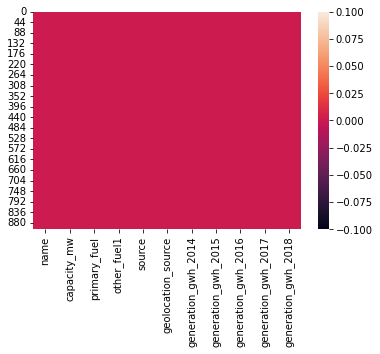

In [19]:
sns.heatmap(df1.isnull())

Now we don't have any Null Values in the dataset.

# Encoding

In [20]:
df1.dtypes

name                    object
capacity_mw            float64
primary_fuel            object
other_fuel1             object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [21]:
le=LabelEncoder()
df1['name']=le.fit_transform(df1['name'])
df1['primary_fuel']=le.fit_transform(df1['primary_fuel'])
df1['other_fuel1']=le.fit_transform(df1['other_fuel1'])
df1['source']=le.fit_transform(df1['source'])
df1['geolocation_source']=le.fit_transform(df1['geolocation_source'])
df1

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [22]:
df1.dtypes

name                     int32
capacity_mw            float64
primary_fuel             int32
other_fuel1              int32
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

# Correlation

In [23]:
df1.corr()

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.060240,0.040753,-0.074663,-0.014640,0.036225,0.082439,0.071257,0.064611,0.068557,0.064724
capacity_mw,0.060240,1.000000,-0.380395,0.003105,-0.242122,0.204865,0.793497,0.819676,0.853008,0.868338,0.884840
primary_fuel,0.040753,-0.380395,1.000000,0.004912,0.053613,-0.483217,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
other_fuel1,-0.074663,0.003105,0.004912,1.000000,0.026590,-0.021408,0.005598,0.008950,0.013919,0.012077,0.018076
source,-0.014640,-0.242122,0.053613,0.026590,1.000000,-0.505720,-0.125854,-0.131123,-0.135018,-0.134934,-0.141216
geolocation_source,0.036225,0.204865,-0.483217,-0.021408,-0.505720,1.000000,0.101329,0.105571,0.108707,0.108639,0.113697
generation_gwh_2014,0.082439,0.793497,-0.240656,0.005598,-0.125854,0.101329,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.071257,0.819676,-0.249304,0.008950,-0.131123,0.105571,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.064611,0.853008,-0.259708,0.013919,-0.135018,0.108707,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.068557,0.868338,-0.263599,0.012077,-0.134934,0.108639,0.904075,0.940229,0.973909,1.000000,0.986685


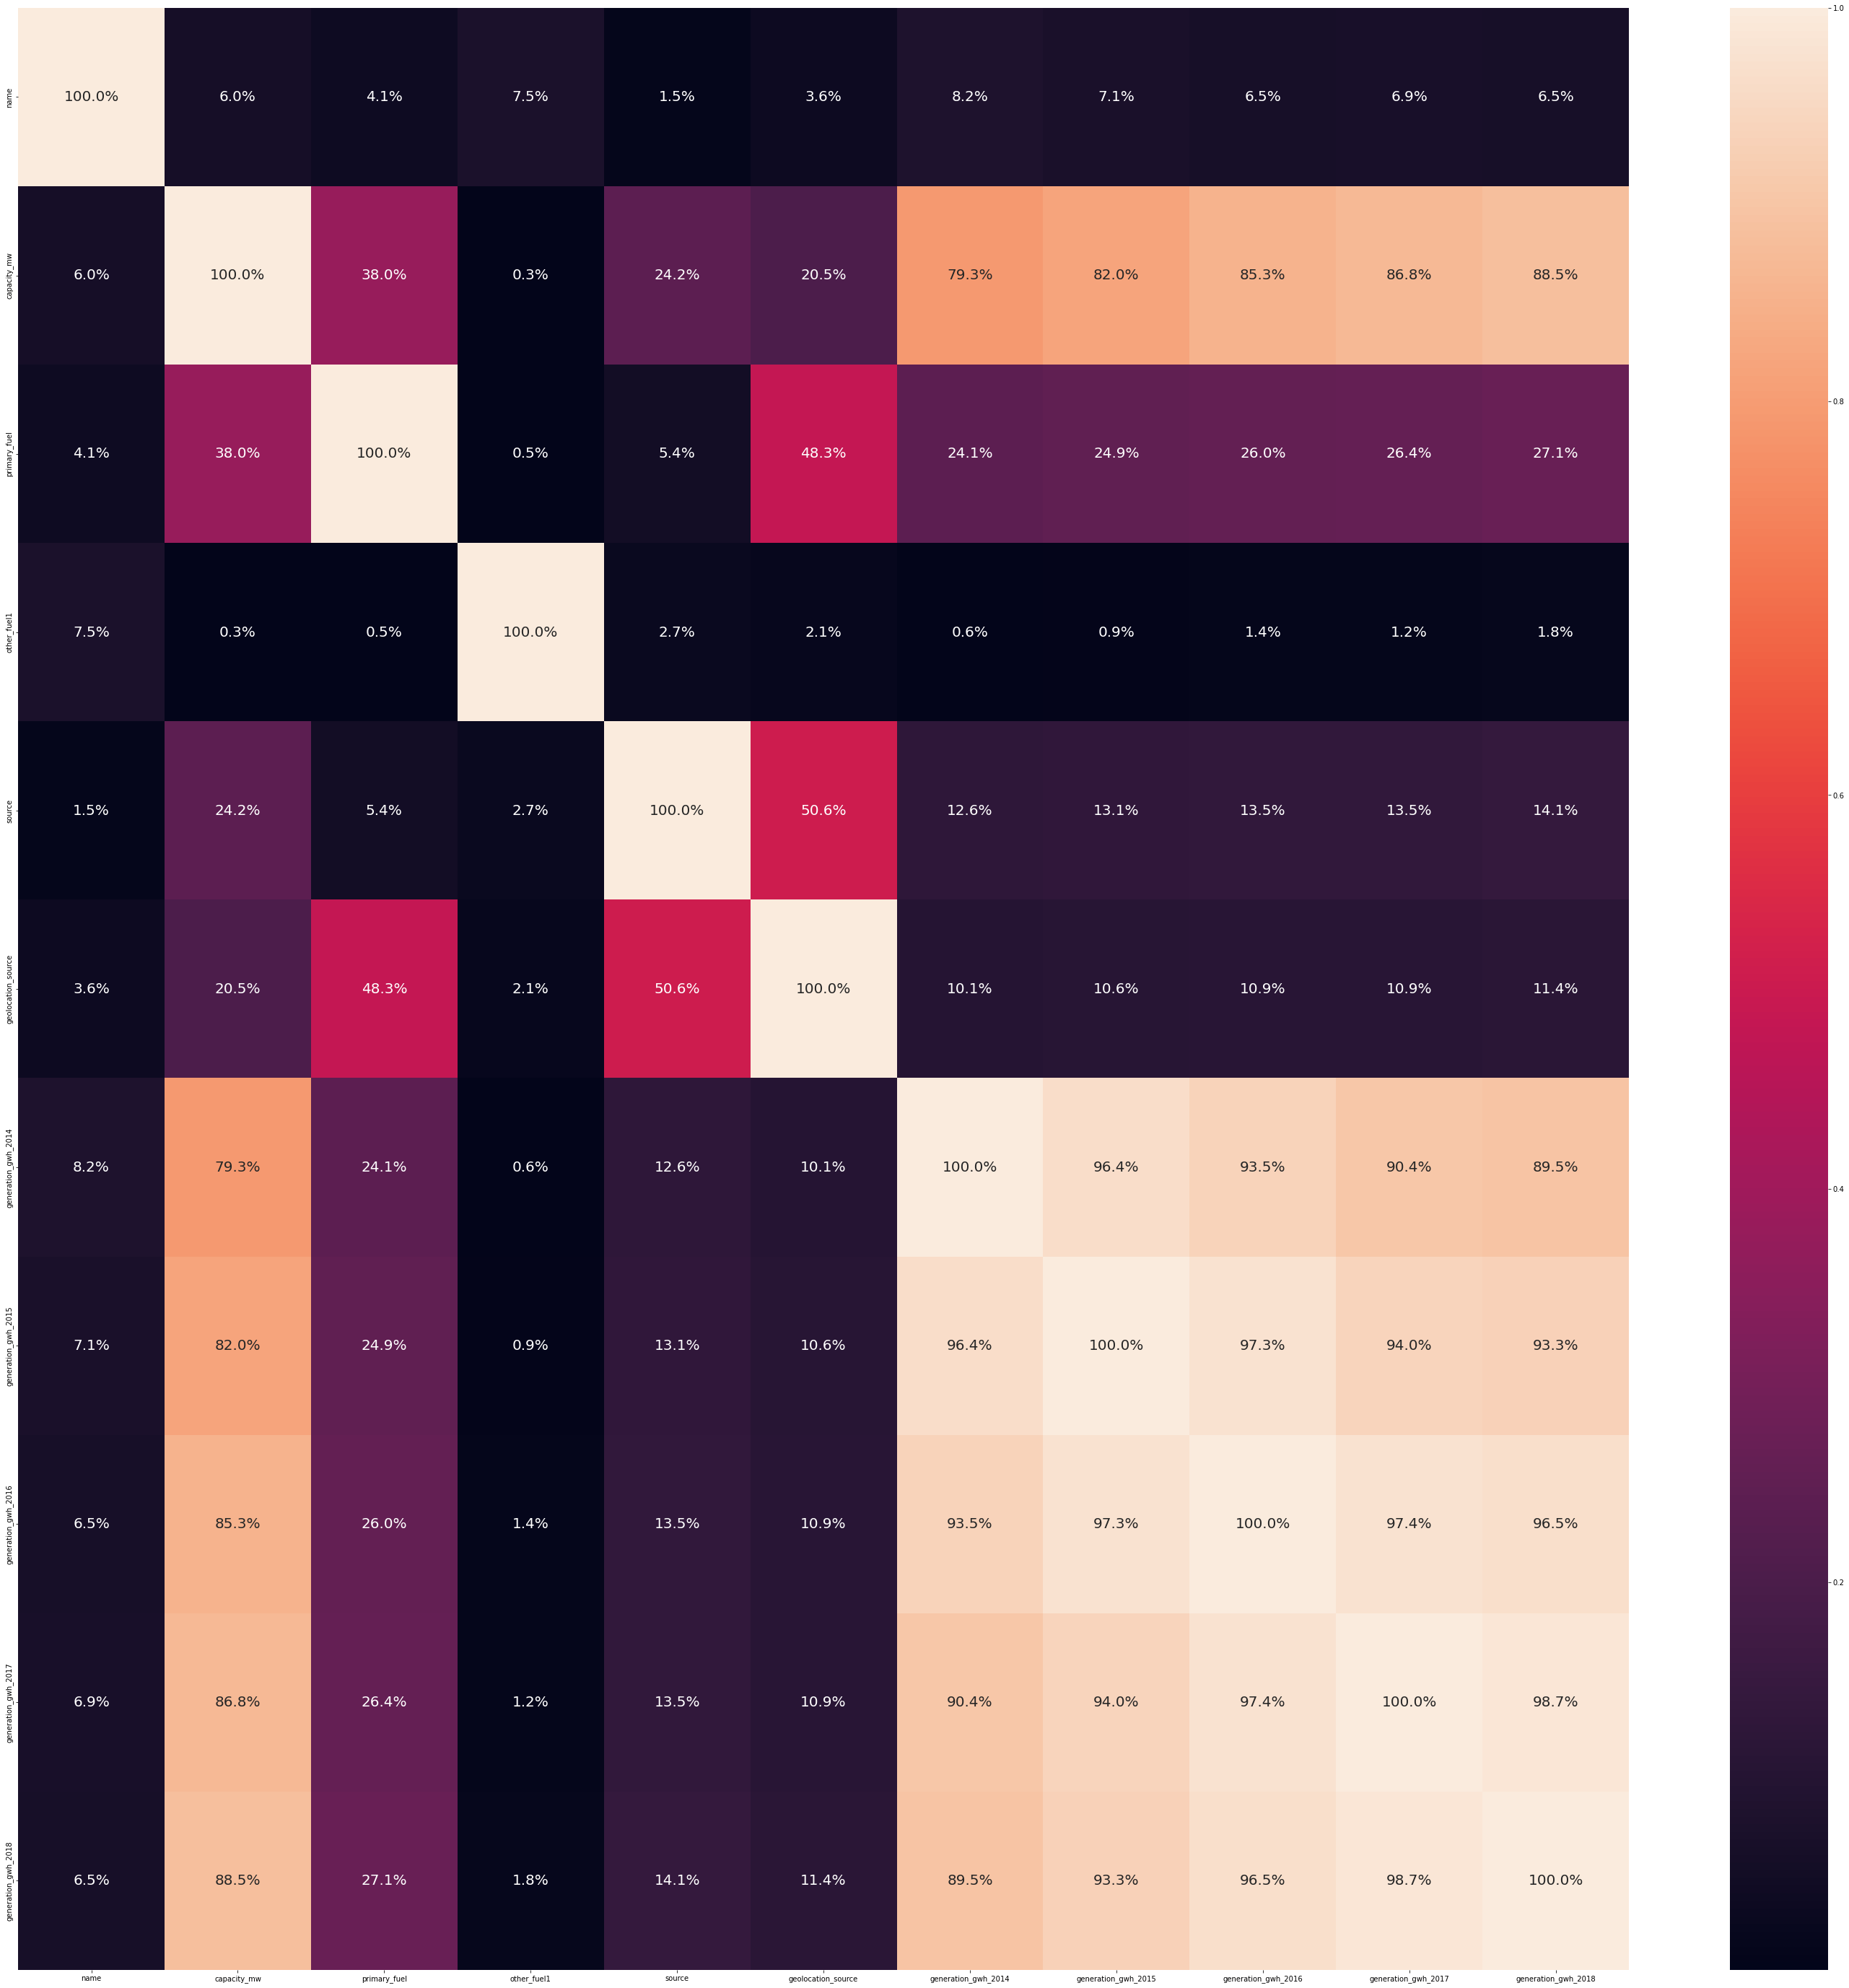

In [24]:
corr=df1.corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True,annot_kws={'size':20},fmt='.1%')
plt.show()

Above is the correlation of the dataset.

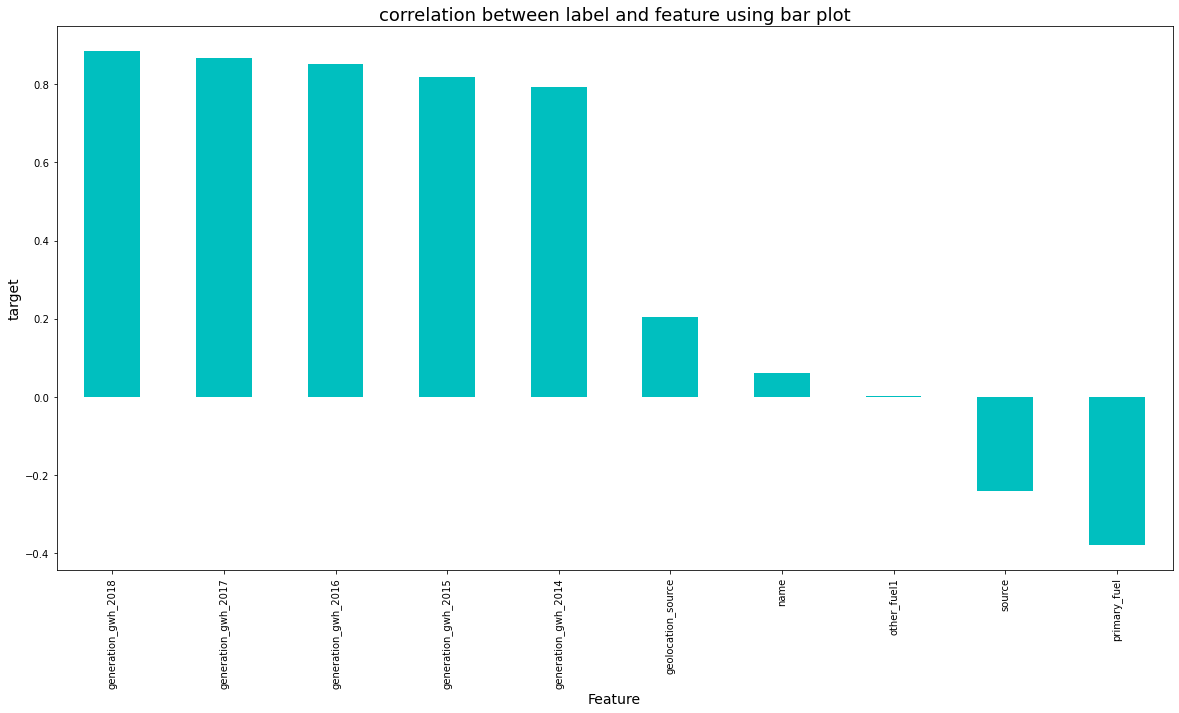

In [25]:
plt.figure(figsize=(20,10))
df1.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

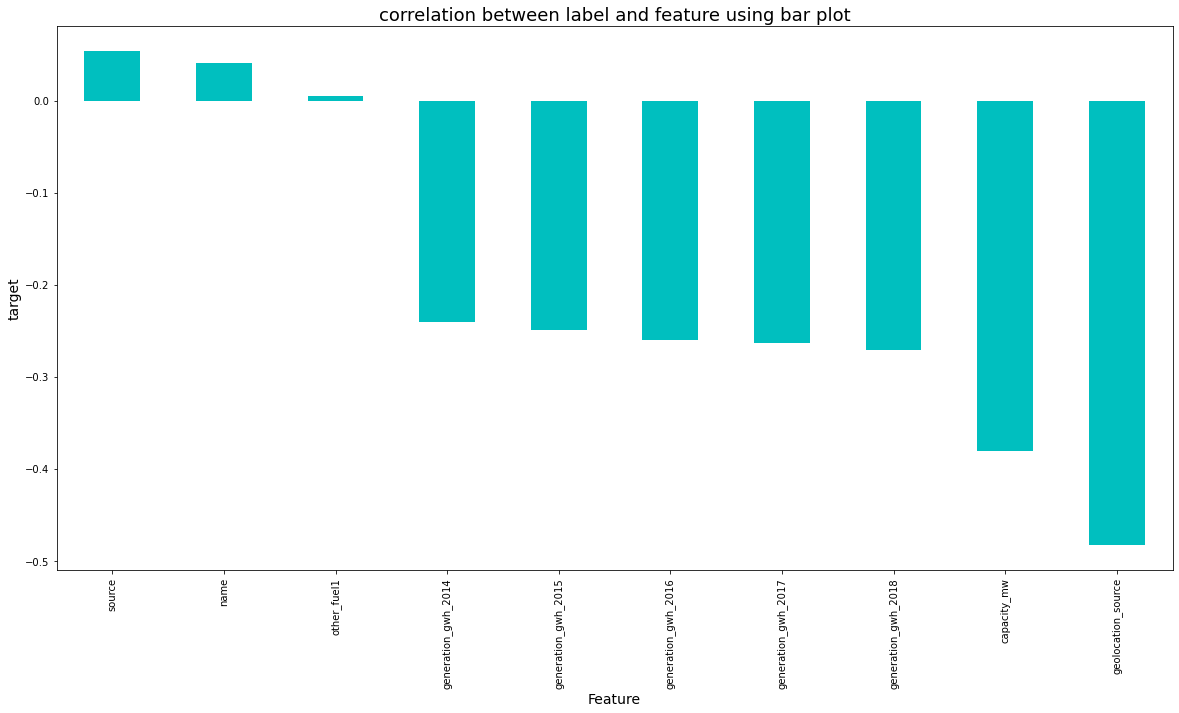

In [26]:
plt.figure(figsize=(20,10))
df1.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

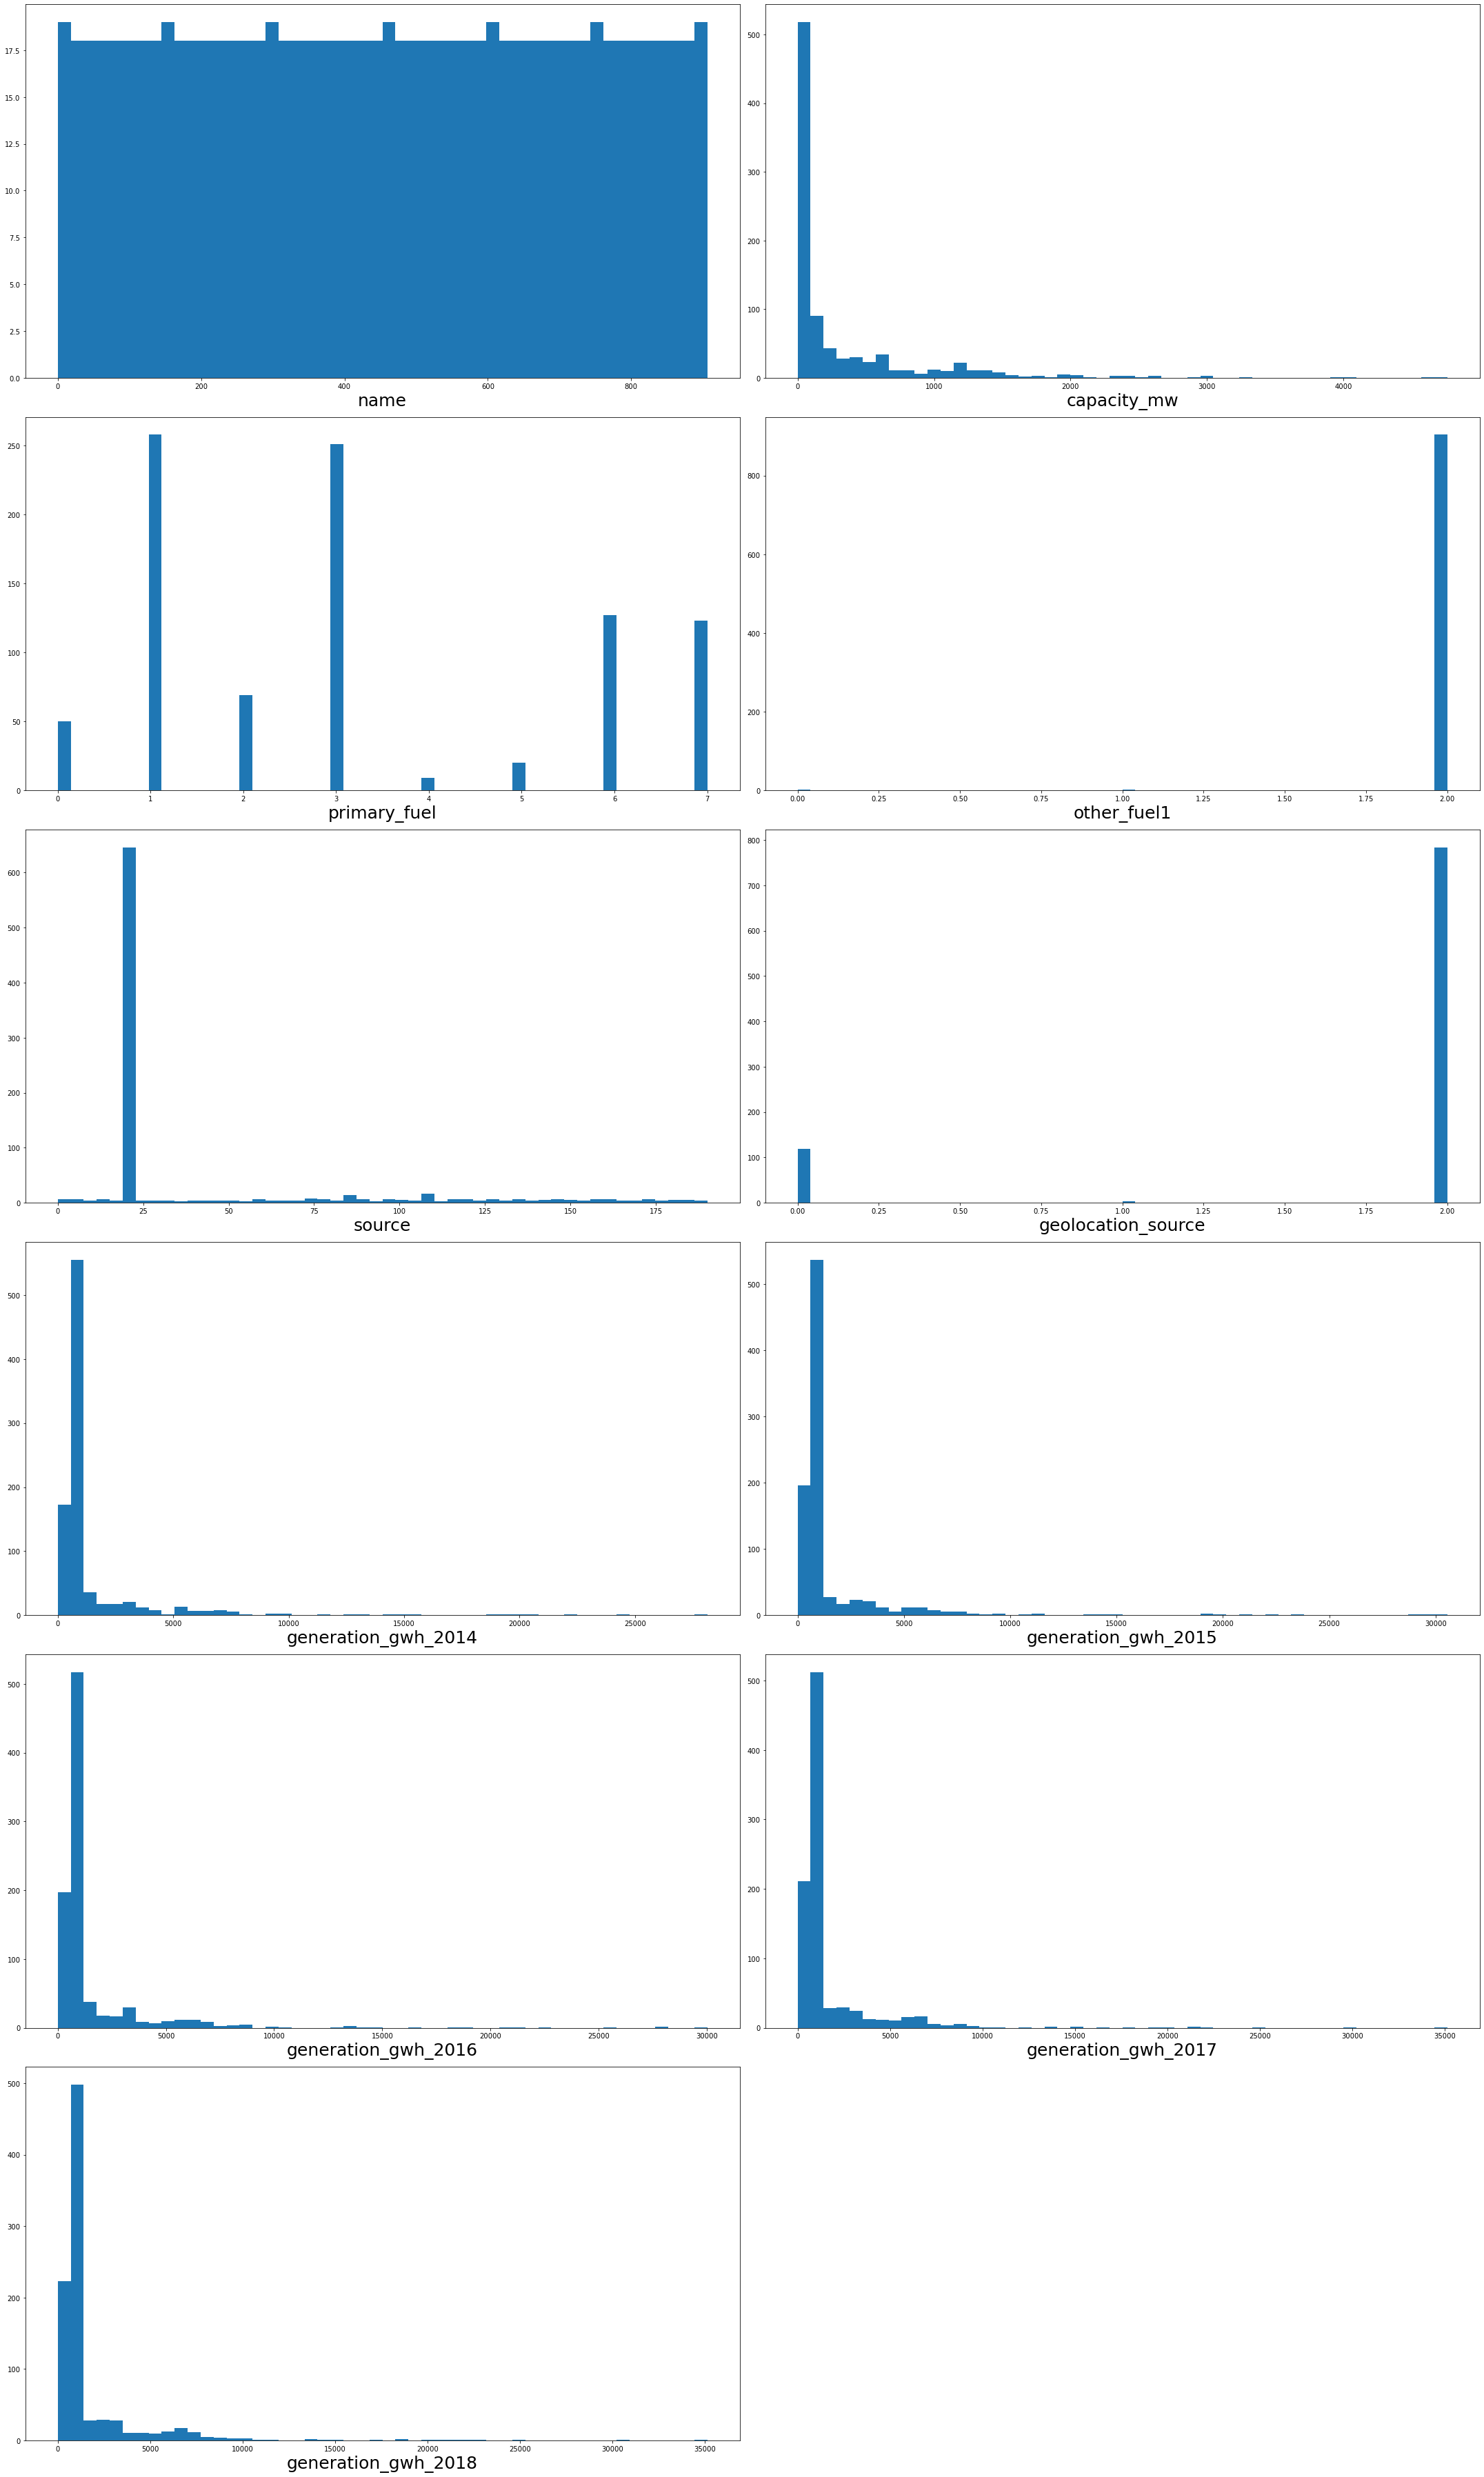

In [27]:
plt.figure(figsize=[30,50])
plotnumber=1
for column in df1:
    
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(df1[column],bins=50)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
    plt.tight_layout()

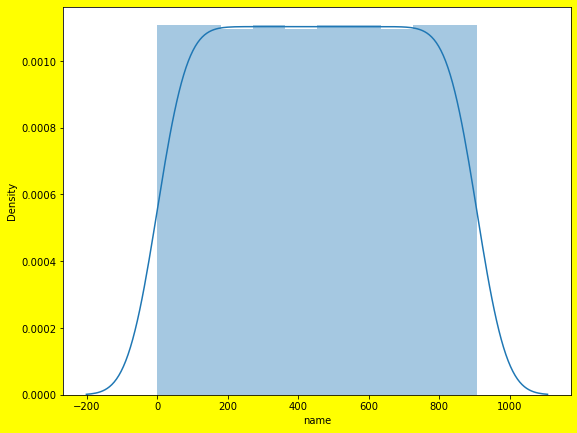

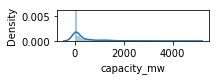

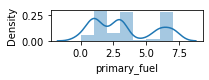

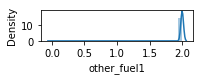

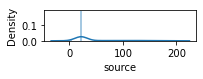

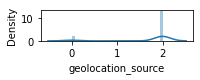

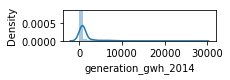

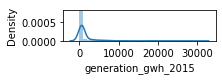

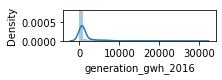

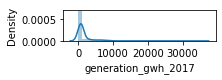

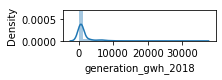

In [28]:
plt.figure(figsize=(20,50),facecolor="yellow")
plotnumber=1
for column in df1:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
    plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

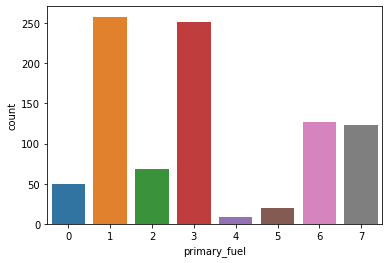

In [29]:
#Count plot for primary_fuel
sns.countplot(df1['primary_fuel'])

The above plot shows, 1 and 3 have more counts when compared to others.

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

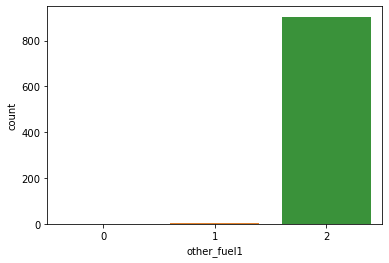

In [30]:
#Count plot for other_fuel1
sns.countplot(df1['other_fuel1'])

The 2nd type is having more than 800 value.

In [31]:
df1

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

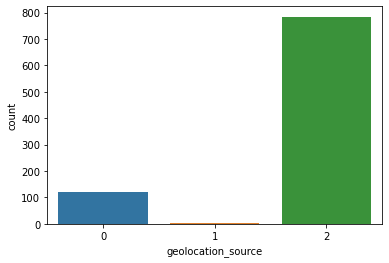

In [32]:
#Count plot for geolocation_source
sns.countplot(df1['geolocation_source'])

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

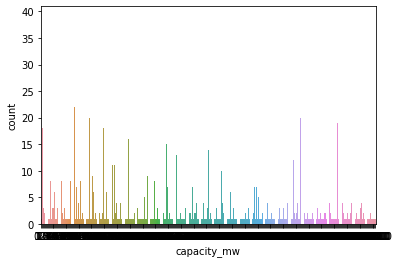

In [33]:
#Count plot for geolocation_source
sns.countplot(df1['capacity_mw'])

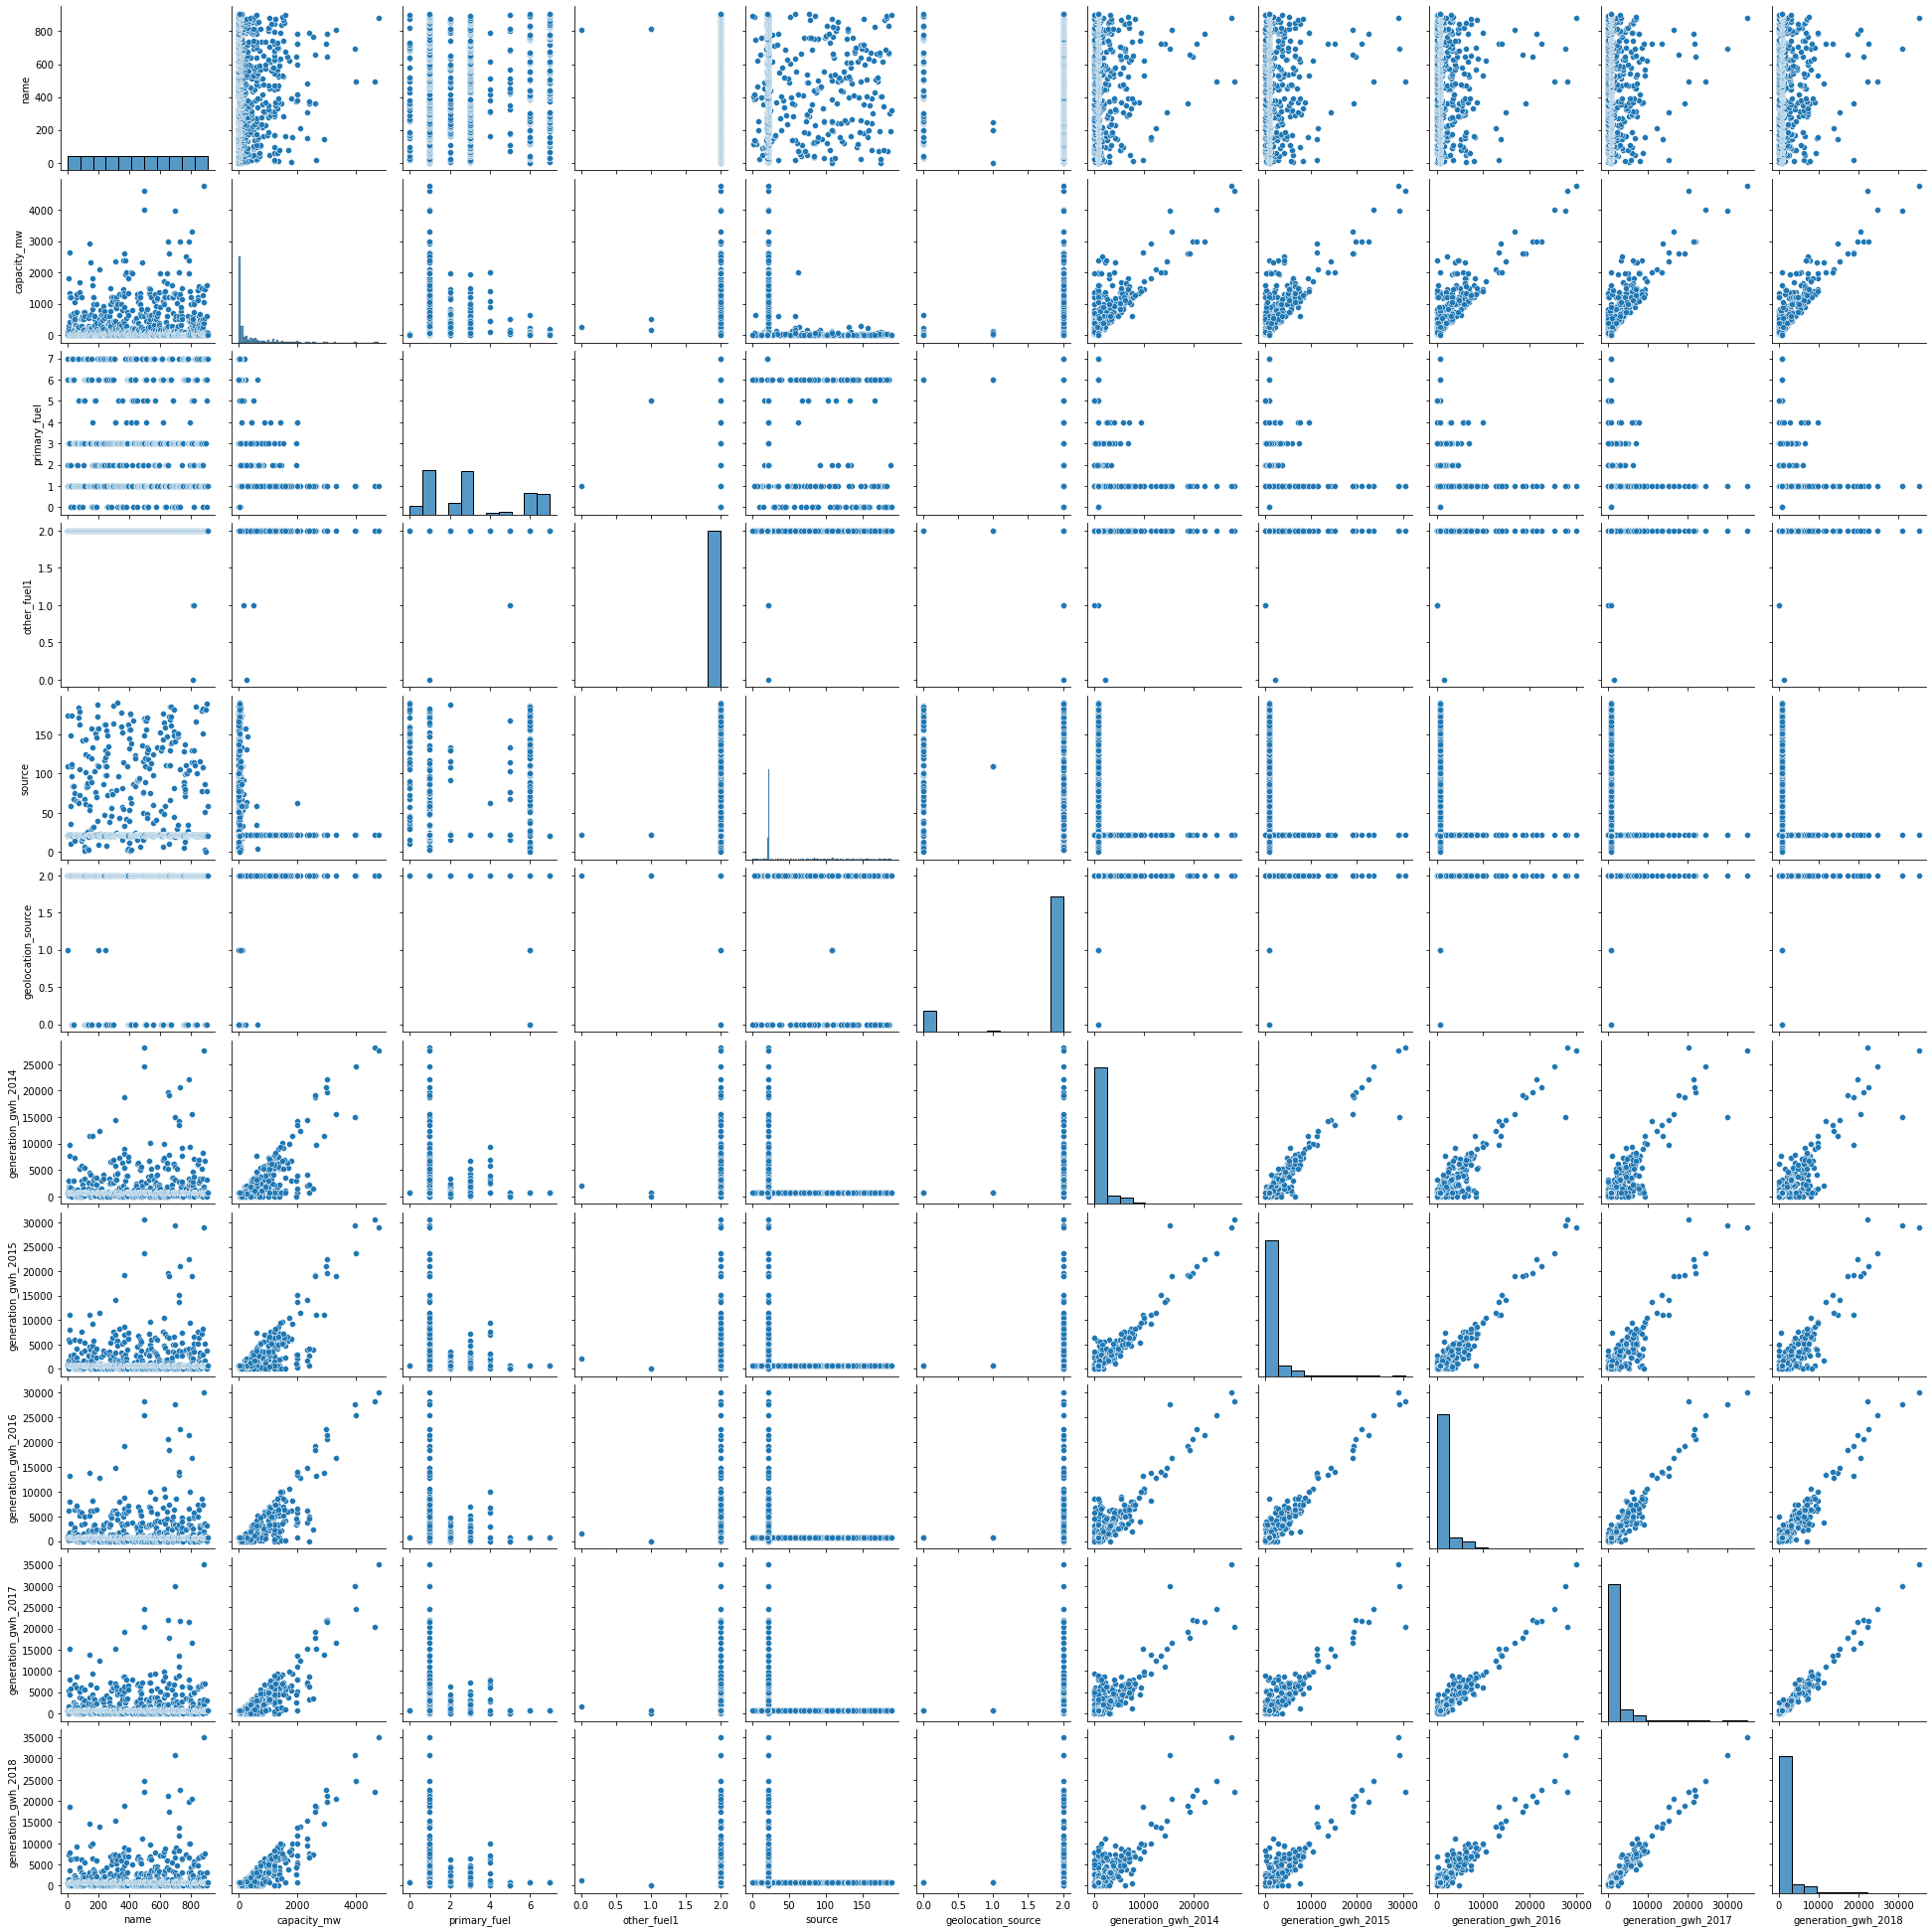

In [35]:
sns.pairplot(df1)

# Checking Outliers

In [36]:
df1

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


<AxesSubplot:>

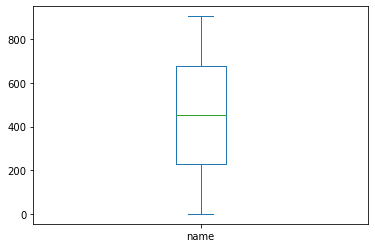

In [37]:
df1['name'].plot.box()

<AxesSubplot:>

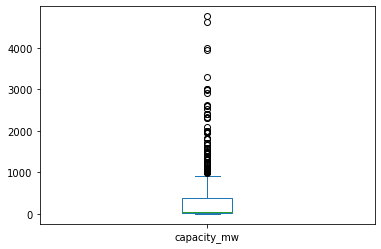

In [38]:
df1['capacity_mw'].plot.box()

Outliers are present in capacity_mw column.

<AxesSubplot:>

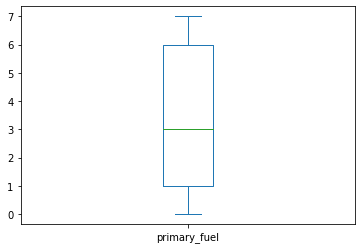

In [39]:
df1['primary_fuel'].plot.box()

<AxesSubplot:>

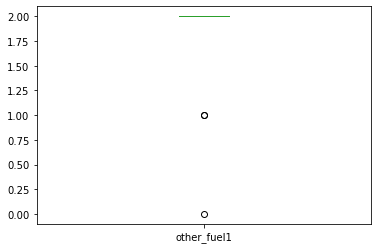

In [40]:
df1['other_fuel1'].plot.box()

Outliers are present.

<AxesSubplot:>

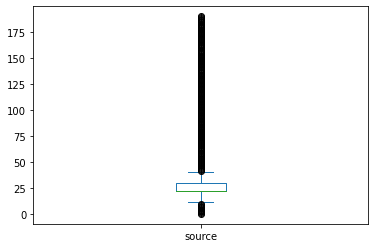

In [41]:
df1['source'].plot.box()

Outliers are present in source.

<AxesSubplot:>

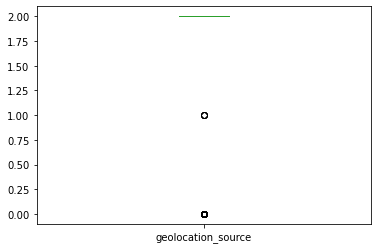

In [42]:
df1['geolocation_source'].plot.box()

outliers present in geolocation_source.

<AxesSubplot:>

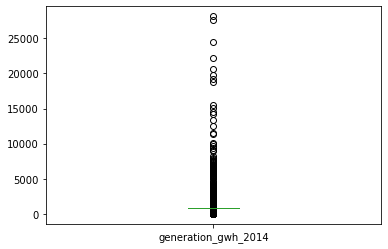

In [43]:
df1['generation_gwh_2014'].plot.box()

Outliers present in generation_gwh_2014.

<AxesSubplot:>

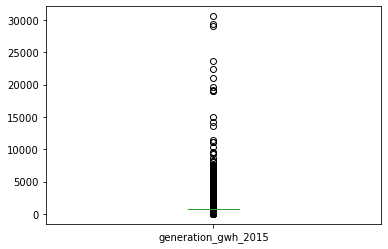

In [44]:
df1['generation_gwh_2015'].plot.box()

Outliers are present in generation_gwh_2015.

<AxesSubplot:>

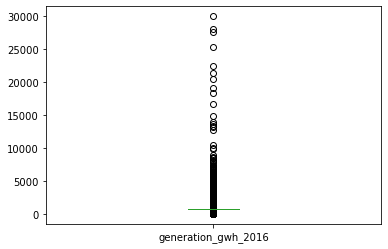

In [45]:
df1['generation_gwh_2016'].plot.box()

Outliers are present in generation_gwh_2016.

<AxesSubplot:>

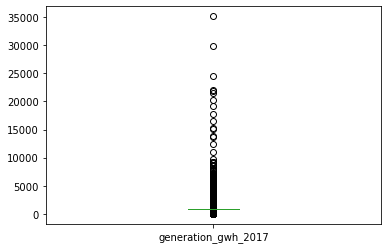

In [46]:
df1['generation_gwh_2017'].plot.box()

Outliers are present in generation_gwh_2017.

<AxesSubplot:>

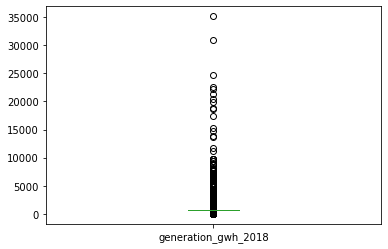

In [47]:
df1['generation_gwh_2018'].plot.box()

Outliers are present in generation_gwh_2018.

<AxesSubplot:>

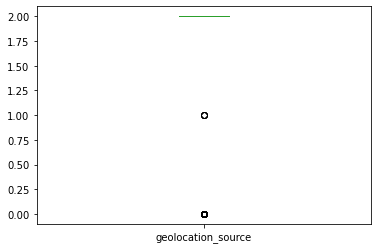

In [48]:
df1['geolocation_source'].plot.box()

Outliers are present in geolocation_source.

# Removing Outliers

In [49]:
from scipy.stats import zscore

df1zscore=np.abs(zscore(df1))
print(np.where(df1zscore>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 191, 209, 209, 209, 209, 209, 209, 299, 308, 308, 308,
       308, 308, 308, 321, 345, 363, 364, 364, 364, 364, 364, 364, 375,
       482, 482, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       494, 532, 623, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657,
       657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 721, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 767, 786, 786, 786, 786, 786, 786, 788, 808, 808, 808, 808,
       808, 808, 811, 813, 817, 832, 870, 871, 879, 880, 880, 880, 880,
       880, 880, 895, 900], dtype=int64), array([ 1,  7,  8,  9, 10,  4,  4,  1,  6,  7,  8,  9, 10,  1,  6,  4,  1,
        6,  7,  8,  9, 10,  4,  1,  6,  7,  8,  9, 10,  4,  4,  1,  1,  6,
        7,  8,  9, 10,  1,  1, 10,  1,  6,  7,  8,  9, 10,  1,  6,  7,  8,
        9, 10,  6,  6,  1,  6,  7,  8,  9, 10,  1,  6,  7,  8,  9, 10,  4,
        4

In [50]:
df1new=df1[(df1zscore<3).all(axis=1)]
print('df1new.shape=',df1new.shape)

df1=df1new

df1new.shape= (864, 11)


In [51]:
df1

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [52]:
# dataloss

dataloss=(907-864)/907*100
dataloss

4.740904079382579

The dataloss is around 4.7. 

# Skewness

In [53]:
df1.skew()

name                   0.018024
capacity_mw            2.026966
primary_fuel           0.435638
other_fuel1            0.000000
source                 1.831401
geolocation_source    -2.149195
generation_gwh_2014    2.991705
generation_gwh_2015    2.794520
generation_gwh_2016    2.731068
generation_gwh_2017    2.626536
generation_gwh_2018    2.694656
dtype: float64

In [56]:
df1['capacity_mw']=np.sqrt(df1['capacity_mw'])
df1.skew()

name                   0.018024
capacity_mw            0.258996
primary_fuel           0.435638
other_fuel1            0.000000
source                 1.831401
geolocation_source    -2.149195
generation_gwh_2014    2.991705
generation_gwh_2015    2.794520
generation_gwh_2016    2.731068
generation_gwh_2017    2.626536
generation_gwh_2018    2.694656
dtype: float64

In [59]:
df1['source']=np.sqrt(df1['source'])
df1.skew()

name                   0.018024
capacity_mw            0.258996
primary_fuel           0.435638
other_fuel1            0.000000
source                -0.143822
geolocation_source    -2.149195
generation_gwh_2014    2.991705
generation_gwh_2015    2.794520
generation_gwh_2016    2.731068
generation_gwh_2017    2.626536
generation_gwh_2018    2.694656
dtype: float64

In [61]:
df1['generation_gwh_2014']=np.sqrt(df1['generation_gwh_2014'])
df1.skew()

name                   0.018024
capacity_mw            0.258996
primary_fuel           0.435638
other_fuel1            0.000000
source                -0.143822
geolocation_source    -2.149195
generation_gwh_2014   -0.591003
generation_gwh_2015    2.794520
generation_gwh_2016    2.731068
generation_gwh_2017    2.626536
generation_gwh_2018    2.694656
dtype: float64

In [63]:
df1['generation_gwh_2015']=np.sqrt(df1['generation_gwh_2015'])
df1.skew()

name                   0.018024
capacity_mw            0.258996
primary_fuel           0.435638
other_fuel1            0.000000
source                -0.143822
geolocation_source    -2.149195
generation_gwh_2014   -0.591003
generation_gwh_2015   -0.347894
generation_gwh_2016    2.731068
generation_gwh_2017    2.626536
generation_gwh_2018    2.694656
dtype: float64

In [65]:
df1['generation_gwh_2016']=np.sqrt(df1['generation_gwh_2016'])
df1.skew()

name                   0.018024
capacity_mw            0.258996
primary_fuel           0.435638
other_fuel1            0.000000
source                -0.143822
geolocation_source    -2.149195
generation_gwh_2014   -0.591003
generation_gwh_2015   -0.347894
generation_gwh_2016   -0.351095
generation_gwh_2017    2.626536
generation_gwh_2018    2.694656
dtype: float64

In [67]:
df1['generation_gwh_2017']=np.sqrt(df1['generation_gwh_2017'])
df1.skew()

name                   0.018024
capacity_mw            0.258996
primary_fuel           0.435638
other_fuel1            0.000000
source                -0.143822
geolocation_source    -2.149195
generation_gwh_2014   -0.591003
generation_gwh_2015   -0.347894
generation_gwh_2016   -0.351095
generation_gwh_2017   -0.496555
generation_gwh_2018    2.694656
dtype: float64

In [69]:
df1['generation_gwh_2018']=np.sqrt(df1['generation_gwh_2018'])
df1.skew()

name                   0.018024
capacity_mw            0.258996
primary_fuel           0.435638
other_fuel1            0.000000
source                -0.143822
geolocation_source    -2.149195
generation_gwh_2014   -0.591003
generation_gwh_2015   -0.347894
generation_gwh_2016   -0.351095
generation_gwh_2017   -0.496555
generation_gwh_2018   -0.439573
dtype: float64

# Splitting dataset into two parts: Input and Target Variable

In [70]:
df1_new=df1
df1_new

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,1.121353,6,2,1.797539,1,5.320163,5.164105,5.210713,5.347925,5.236042
1,1,1.773794,1,2,1.905762,2,5.320163,5.164105,5.210713,5.347925,5.236042
2,2,1.581833,7,2,1.463111,2,5.320163,5.164105,5.210713,5.347925,5.236042
3,3,1.846255,2,2,1.471644,2,4.985516,5.389557,5.455807,5.075807,5.002476
4,4,2.552167,1,2,1.471644,2,7.422656,8.770288,8.888906,8.566593,9.236723
...,...,...,...,...,...,...,...,...,...,...,...
902,902,2.514867,1,2,1.471644,2,5.320163,0.998716,3.909459,5.423807,5.118705
903,903,1.147203,6,2,1.721121,0,5.320163,5.164105,5.210713,5.347925,5.236042
904,904,1.499055,7,2,1.463111,2,5.320163,5.164105,5.210713,5.347925,5.236042
905,905,1.729363,1,2,1.664779,2,5.320163,5.164105,5.210713,5.347925,5.236042


In [71]:
df1_new['primary_fuel'].value_counts()

3    251
1    228
7    123
6    122
2     68
0     45
5     18
4      9
Name: primary_fuel, dtype: int64

In [72]:
x=df1_new.drop('capacity_mw', axis=1)
x

,name,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,6,2,1.797539,1,5.320163,5.164105,5.210713,5.347925,5.236042
1,1,1,2,1.905762,2,5.320163,5.164105,5.210713,5.347925,5.236042
2,2,7,2,1.463111,2,5.320163,5.164105,5.210713,5.347925,5.236042
3,3,2,2,1.471644,2,4.985516,5.389557,5.455807,5.075807,5.002476
4,4,1,2,1.471644,2,7.422656,8.770288,8.888906,8.566593,9.236723
...,...,...,...,...,...,...,...,...,...,...
902,902,1,2,1.471644,2,5.320163,0.998716,3.909459,5.423807,5.118705
903,903,6,2,1.721121,0,5.320163,5.164105,5.210713,5.347925,5.236042
904,904,7,2,1.463111,2,5.320163,5.164105,5.210713,5.347925,5.236042
905,905,1,2,1.664779,2,5.320163,5.164105,5.210713,5.347925,5.236042


In [73]:
x.shape

(864, 10)

In [74]:
y=df1_new['capacity_mw']
y

0      1.121353
1      1.773794
2      1.581833
3      1.846255
4      2.552167
         ...   
902    2.514867
903    1.147203
904    1.499055
905    1.729363
906    1.419664
Name: capacity_mw, Length: 864, dtype: float64

In [75]:
y.shape

(864,)

# Scaling using StandardScaler 

In [76]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,name,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.720487,1.195703,0.0,1.659773,-1.078153,0.027980,0.002108,0.003214,0.034322,0.005699
1,-1.716645,-1.004227,0.0,2.351254,0.395778,0.027980,0.002108,0.003214,0.034322,0.005699
2,-1.712804,1.635689,0.0,-0.477019,0.395778,0.027980,0.002108,0.003214,0.034322,0.005699
3,-1.708962,-0.564241,0.0,-0.422500,0.395778,-0.181420,0.137882,0.147722,-0.120970,-0.124631
4,-1.705120,-1.004227,0.0,-0.422500,0.395778,1.343581,2.173852,2.171891,1.871142,2.238090
...,...,...,...,...,...,...,...,...,...,...
859,1.744612,-1.004227,0.0,-0.422500,0.395778,0.027980,-2.506405,-0.764011,0.077626,-0.059775
860,1.748454,1.195703,0.0,1.171506,-2.552084,0.027980,0.002108,0.003214,0.034322,0.005699
861,1.752295,1.635689,0.0,-0.477019,0.395778,0.027980,0.002108,0.003214,0.034322,0.005699
862,1.756137,-1.004227,0.0,0.811514,0.395778,0.027980,0.002108,0.003214,0.034322,0.005699


# For Regression Model Building

# Finding best random state

In [77]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.5667560840379322  on Random_state  129


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxRS)

# Creating train_test_split

In [79]:
x_train.shape

(691, 10)

In [80]:
y_train.shape

(691,)

In [81]:
x_test.shape

(173, 10)

In [82]:
y_test.shape

(173,)

# Linear Regression

In [83]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.5964798103783318
MAE: 0.2243259600742077
MSE: 0.07889916308593099
RMSE: 0.2808899483533204


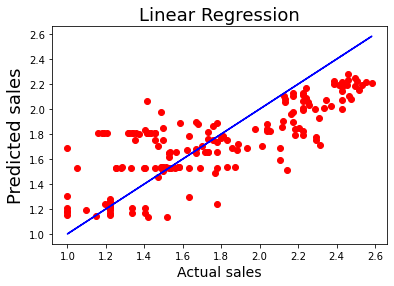

In [84]:
plt.scatter(x=y_test, y=predLR, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

# Decision Tree Regressor

In [85]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,preddtr))
print('MAE:',metrics.mean_absolute_error(y_test, preddtr))
print('MSE:',metrics.mean_squared_error(y_test, preddtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddtr)))

R2_score: 0.7277288181003883
MAE: 0.16652452859997227
MSE: 0.05323641526942599
RMSE: 0.23073017849736516


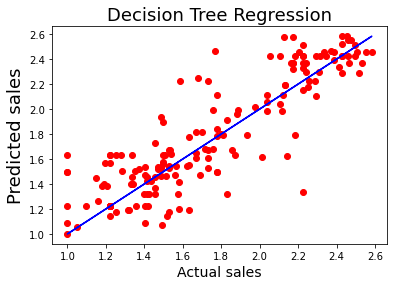

In [86]:
plt.scatter(x=y_test, y=preddtr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Decision Tree Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# KNeighbors Regressor

In [87]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
predknr=KNR.predict(x_test)
print('R2_score:',r2_score(y_test,predknr))
print('MAE:',metrics.mean_absolute_error(y_test, predknr))
print('MSE:',metrics.mean_squared_error(y_test, predknr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknr)))

R2_score: 0.7637137818426573
MAE: 0.14446456174609382
MSE: 0.04620037693487685
RMSE: 0.21494272943013645


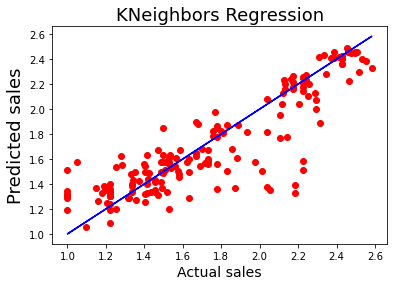

In [88]:
plt.scatter(x=y_test, y=predknr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNeighbors Regression', fontsize=18)
plt.savefig('knr.png')
plt.show()

# SupportVector Regressor

In [89]:
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print('R2_score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

R2_score: 0.790950602083553
MAE: 0.1500382922147502
MSE: 0.040874838393314815
RMSE: 0.20217526652218074


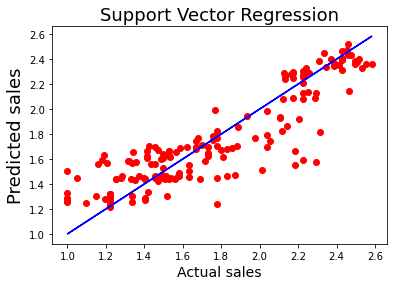

In [90]:
plt.scatter(x=y_test, y=predsvr, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Support Vector Regression', fontsize=18)
plt.savefig('svr.png')
plt.show()

# Regularization

# Lasso Regressor

In [91]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [92]:
lasso=Lasso(alpha=0.01,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 0.5860941022062086
MAE: 0.2311213093490976
MSE: 0.08092985127430519
RMSE: 0.2844817239723937


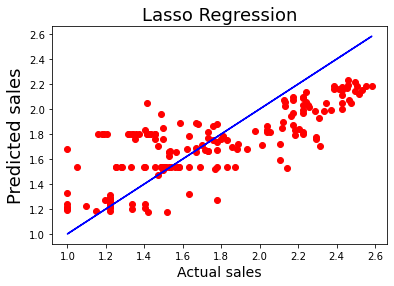

In [93]:
plt.scatter(x=y_test, y=pred_lasso, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Lasso Regression', fontsize=18)
plt.savefig('lasso.png')
plt.show()

# Ridge Regressor

In [94]:
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'solver': 'sag'}


In [95]:
ridge=Ridge(alpha=10,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.5952513308156843
MAE: 0.2250615420198603
MSE: 0.07913936422543763
RMSE: 0.28131719504046965


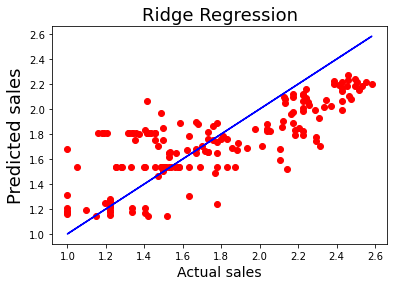

In [96]:
plt.scatter(x=y_test, y=pred_ridge, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Ridge Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# SGD Regressor

In [97]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

R2_Score: 0.5996803992629957
MAE: 0.22224750879695593
MSE: 0.0782733609801705
RMSE: 0.2797737674982601


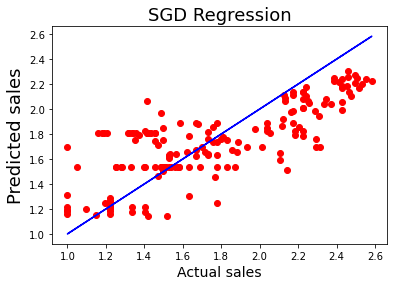

In [98]:
plt.scatter(x=y_test, y=predSGD, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('SGD Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# Checking Cross validation Score

In [99]:
rfscore=cross_val_score(LR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 40.368718065133265


In [100]:
rfscore=cross_val_score(DTR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 67.03922070627944


In [101]:
rfscore=cross_val_score(KNR, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 67.34405506401305


In [102]:
rfscore=cross_val_score(svr, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 66.28467440704131


In [103]:
rfscore=cross_val_score(lasso, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 40.99035293894324


In [104]:
rfscore=cross_val_score(ridge, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 40.719081309486015


In [105]:
rfscore=cross_val_score(SGD, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 41.179464200607256


# Ensemble Technique

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [107]:
rf=RandomForestRegressor(criterion="mse",max_features='log2')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf, x_train, y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 0.9703362343678932
R2 Score: 87.09947605913054
Cross Val Score: 78.61522760626998


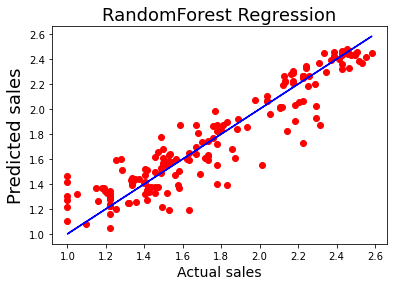

In [108]:
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('RandomForest Regression', fontsize=18)
plt.savefig('rff.png')
plt.show()

# Saving the best Regressor model

In [109]:
import joblib

joblib.dump(rf,'Global.obj')

Global_loadmodel=joblib.load('Global.obj')
prediction=Global_loadmodel.predict(x_test)
prediction

array([2.44384392, 1.19429461, 2.46424128, 2.391939  , 1.87308645,
       1.50899333, 1.31641114, 1.95981856, 1.82432303, 1.47699509,
       1.37768012, 1.52551073, 1.40976414, 1.77870637, 1.08339248,
       1.62346166, 2.01647699, 2.43351847, 1.3988229 , 2.26569455,
       1.36885862, 2.45955616, 1.15599424, 2.06304437, 1.24687024,
       1.42545994, 1.30580751, 2.10122034, 1.60276872, 1.50647929,
       1.86053468, 1.26042838, 1.55265594, 2.41994367, 1.35509053,
       1.59990888, 1.24248275, 1.04804061, 1.59193613, 1.9834978 ,
       1.87073713, 1.72692449, 1.58805299, 2.25717037, 2.06823376,
       2.43230508, 1.60236932, 1.85275204, 2.32696954, 2.2777766 ,
       1.61116439, 1.61014689, 1.57101363, 1.37665804, 1.51241503,
       1.87067481, 1.27025636, 1.80601816, 1.34687568, 2.26718428,
       2.19076541, 2.32541356, 1.58172985, 1.82340224, 1.40923544,
       2.42538514, 1.83773424, 1.39065396, 1.41686067, 1.3431406 ,
       1.74385898, 1.5699338 , 1.20226717, 1.32067972, 2.45932

In [110]:
conclusion=pd.DataFrame([Global_loadmodel.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
Predicted,2.443844,1.194295,2.464241,2.391939,1.873086,1.508993,1.316411,1.959819,1.824323,1.476995,...,1.89326,2.260735,1.368389,1.676159,1.25515,1.579118,1.5951,1.393567,2.382433,2.432644
Original,2.443844,1.194295,2.464241,2.391939,1.873086,1.508993,1.316411,1.959819,1.824323,1.476995,...,1.89326,2.260735,1.368389,1.676159,1.25515,1.579118,1.5951,1.393567,2.382433,2.432644


# For Classification model Building

In [140]:
X=df1.drop('primary_fuel', axis=1)
X

,name,capacity_mw,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,1.121353,2,1.797539,1,5.320163,5.164105,5.210713,5.347925,5.236042
1,1,1.773794,2,1.905762,2,5.320163,5.164105,5.210713,5.347925,5.236042
2,2,1.581833,2,1.463111,2,5.320163,5.164105,5.210713,5.347925,5.236042
3,3,1.846255,2,1.471644,2,4.985516,5.389557,5.455807,5.075807,5.002476
4,4,2.552167,2,1.471644,2,7.422656,8.770288,8.888906,8.566593,9.236723
...,...,...,...,...,...,...,...,...,...,...
902,902,2.514867,2,1.471644,2,5.320163,0.998716,3.909459,5.423807,5.118705
903,903,1.147203,2,1.721121,0,5.320163,5.164105,5.210713,5.347925,5.236042
904,904,1.499055,2,1.463111,2,5.320163,5.164105,5.210713,5.347925,5.236042
905,905,1.729363,2,1.664779,2,5.320163,5.164105,5.210713,5.347925,5.236042


In [141]:
X.shape

(864, 10)

In [142]:
Y=df1['primary_fuel']
Y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 864, dtype: int32

In [143]:
Y.value_counts()

3    251
1    228
7    123
6    122
2     68
0     45
5     18
4      9
Name: primary_fuel, dtype: int64

In [144]:
Y.shape

(864,)

# SMOTE

# !pip install imblearn -- user

pip install imblearn

In [145]:
from imblearn.over_sampling import SMOTE

In [146]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [147]:
Y.value_counts()

6    251
1    251
7    251
2    251
3    251
0    251
5    251
4    251
Name: primary_fuel, dtype: int64

In [148]:
Y.shape

(2008,)

# Finding the best random state

In [149]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 57.96812749003985 on Random State 262


# Creating train_test_split

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=maxRS)

In [151]:
X_train.shape

(1506, 10)

In [152]:
Y_train.shape

(1506,)

In [153]:
X_test.shape

(502, 10)

In [154]:
Y_test.shape

(502,)

# Logistic Regression

In [155]:
LR=LogisticRegression()
LR.fit(X_train, Y_train)
predlr=LR.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

Accuaracy 57.96812749003985
[[53  0  0  0  0  0  0  9]
 [ 7 12  7  6 20  0  0  3]
 [ 1  8 34  4  5  6  0  3]
 [ 4  3 28  4  5 10  0 15]
 [ 0 11  6  0 36  3  0  0]
 [ 9  0  6  4  0 45  0  2]
 [ 1  0  0  1  0  0 75  0]
 [14  0  0 10  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.60      0.85      0.70        62
           1       0.35      0.22      0.27        55
           2       0.42      0.56      0.48        61
           3       0.14      0.06      0.08        69
           4       0.55      0.64      0.59        56
           5       0.70      0.68      0.69        66
           6       1.00      0.97      0.99        77
           7       0.50      0.57      0.53        56

    accuracy                           0.58       502
   macro avg       0.53      0.57      0.54       502
weighted avg       0.54      0.58      0.55       502



In [156]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, X, Y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.4462649346782298


# DecisionTree Classifier

In [157]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
preddtc=dtc.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, preddtc)*100)
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

Accuaracy 81.67330677290838
[[53  4  0  0  0  4  0  1]
 [ 5 28  5  7  6  3  1  0]
 [ 0  6 44  7  1  3  0  0]
 [ 0  9 12 45  2  1  0  0]
 [ 0  4  1  0 51  0  0  0]
 [ 1  2  1  4  0 58  0  0]
 [ 0  1  0  0  0  1 75  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        62
           1       0.52      0.51      0.51        55
           2       0.70      0.72      0.71        61
           3       0.71      0.65      0.68        69
           4       0.85      0.91      0.88        56
           5       0.83      0.88      0.85        66
           6       0.99      0.97      0.98        77
           7       0.98      1.00      0.99        56

    accuracy                           0.82       502
   macro avg       0.81      0.81      0.81       502
weighted avg       0.82      0.82      0.82       502



In [158]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc, X, Y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.783886056004268


# KNeighbors Classifier

In [159]:
knc=KNeighborsClassifier()
knc.fit(X_train, Y_train)
predknc=knc.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, predknc)*100)
print(confusion_matrix(Y_test,predknc))
print(classification_report(Y_test,predknc))

Accuaracy 54.18326693227091
[[40  2  4  4  0  5  2  5]
 [11 21  4  5 11  1  0  2]
 [ 6  4 37  7  1  3  2  1]
 [18 10  7 17  2  6  2  7]
 [ 3  3  6  3 33  0  1  7]
 [ 3  1  7  9  1 37  2  6]
 [ 1  2  0  1  0  3 60 10]
 [ 4  5  3  5  2  1  9 27]]
              precision    recall  f1-score   support

           0       0.47      0.65      0.54        62
           1       0.44      0.38      0.41        55
           2       0.54      0.61      0.57        61
           3       0.33      0.25      0.28        69
           4       0.66      0.59      0.62        56
           5       0.66      0.56      0.61        66
           6       0.77      0.78      0.77        77
           7       0.42      0.48      0.45        56

    accuracy                           0.54       502
   macro avg       0.54      0.54      0.53       502
weighted avg       0.54      0.54      0.54       502



In [160]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(knc, X, Y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.4666716293842509


# SupportVector Classifier

In [161]:
sv=SVC()
sv.fit(X_train, Y_train)
predsv=sv.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, predsv)*100)
print(confusion_matrix(Y_test,predsv))
print(classification_report(Y_test,predsv))

Accuaracy 20.318725099601593
[[18  0  3  0 18  1 17  5]
 [ 5  0  1  0 23  0 15 11]
 [ 4  0  4  0 24 10 12  7]
 [ 7  0  1  0 32  0 14 15]
 [ 4  0  2  0 44  1  2  3]
 [12  0  1  0 31  0 14  8]
 [12  0 13  0 18  0 19 15]
 [ 6  0 11  0 11  3  8 17]]
              precision    recall  f1-score   support

           0       0.26      0.29      0.28        62
           1       0.00      0.00      0.00        55
           2       0.11      0.07      0.08        61
           3       0.00      0.00      0.00        69
           4       0.22      0.79      0.34        56
           5       0.00      0.00      0.00        66
           6       0.19      0.25      0.21        77
           7       0.21      0.30      0.25        56

    accuracy                           0.20       502
   macro avg       0.12      0.21      0.15       502
weighted avg       0.12      0.20      0.14       502



In [163]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(sv, X, Y, cv=5)
print("Cross validation score of Support Vector Classifier model:", scr.mean())

Cross validation score of Support Vector Classifier model: 0.14345479584620538


# Ensemble Technique

In [164]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
predrfc=rfc.predict(X_test)
print("Accuaracy", accuracy_score(Y_test, predrfc)*100)
print(confusion_matrix(Y_test,predrfc))
print(classification_report(Y_test,predrfc))

Accuaracy 87.64940239043824
[[59  2  0  0  0  0  0  1]
 [ 6 33  5  2  6  3  0  0]
 [ 0  3 54  2  1  1  0  0]
 [ 0  6 13 48  2  0  0  0]
 [ 0  1  1  0 54  0  0  0]
 [ 1  2  1  1  0 61  0  0]
 [ 0  0  0  0  0  2 75  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        62
           1       0.70      0.60      0.65        55
           2       0.73      0.89      0.80        61
           3       0.91      0.70      0.79        69
           4       0.86      0.96      0.91        56
           5       0.91      0.92      0.92        66
           6       1.00      0.97      0.99        77
           7       0.98      1.00      0.99        56

    accuracy                           0.88       502
   macro avg       0.87      0.87      0.87       502
weighted avg       0.88      0.88      0.87       502



In [165]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rfc, X, Y, cv=5)
print("Cross validation score of RandomForest Classifier model:", scr.mean())

Cross validation score of RandomForest Classifier model: 0.8267180307936626


In [167]:
RandomForestClassifier()

RandomForestClassifier()

In [168]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [169]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [170]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [171]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [172]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [173]:
RandomForestClassifier()

RandomForestClassifier()

In [174]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=500)

In [175]:
GCV_pred=GCV.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred)

0.848605577689243

# Saving the Final Model

In [178]:
import joblib

joblib.dump(rfc,'Global1model.obj')

Global1_loadmodel=joblib.load('Global1model.obj')
Global1_loadmodel.predict(X_test)

array([6, 2, 5, 3, 5, 7, 2, 6, 2, 1, 7, 4, 5, 6, 1, 0, 6, 3, 6, 3, 2, 5,
       3, 4, 6, 4, 4, 5, 3, 7, 4, 6, 1, 1, 3, 4, 2, 3, 5, 7, 2, 4, 4, 3,
       0, 2, 0, 5, 5, 5, 3, 4, 0, 0, 2, 6, 6, 2, 0, 0, 0, 7, 5, 0, 2, 0,
       7, 2, 2, 5, 4, 3, 0, 2, 0, 6, 5, 2, 7, 4, 5, 6, 1, 7, 1, 2, 1, 6,
       2, 4, 6, 1, 7, 6, 5, 7, 5, 0, 3, 6, 1, 5, 3, 5, 1, 4, 2, 1, 0, 4,
       0, 6, 5, 4, 5, 5, 2, 4, 7, 3, 1, 6, 5, 6, 0, 7, 5, 3, 6, 5, 1, 3,
       3, 1, 6, 7, 4, 3, 6, 2, 3, 4, 4, 0, 6, 4, 5, 7, 5, 6, 3, 7, 6, 5,
       0, 5, 5, 6, 1, 1, 0, 0, 1, 4, 0, 1, 5, 2, 3, 0, 6, 4, 7, 6, 7, 2,
       2, 4, 1, 1, 7, 3, 7, 6, 3, 4, 1, 3, 2, 2, 1, 0, 7, 0, 2, 0, 1, 5,
       7, 0, 3, 0, 4, 2, 0, 2, 0, 0, 4, 6, 3, 7, 2, 7, 4, 7, 3, 0, 5, 0,
       4, 5, 0, 3, 0, 1, 2, 1, 2, 2, 6, 2, 2, 5, 5, 6, 0, 3, 6, 4, 0, 7,
       4, 3, 0, 4, 5, 3, 1, 6, 1, 3, 0, 5, 4, 1, 0, 5, 2, 2, 6, 5, 2, 4,
       6, 4, 0, 4, 4, 6, 7, 6, 0, 6, 5, 2, 6, 1, 5, 1, 0, 7, 6, 2, 6, 4,
       4, 2, 1, 4, 7, 4, 1, 6, 4, 0, 6, 1, 2, 2, 5,

In [179]:
conclusion=pd.DataFrame([Global1_loadmodel.predict(X_test)[:],predrfc[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
Predicted,6,2,5,3,5,7,2,6,2,1,...,4,2,6,5,2,6,1,3,4,4
Original,6,2,5,3,5,7,2,6,2,1,...,4,2,6,5,2,6,1,3,4,4
